In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cv2
from skimage import io,draw
import numpy as np

In [3]:
## 使用dlib.get_frontal_face_detector识别人脸
detector = dlib.get_frontal_face_detector()
image = io.imread("/Users/Daitu/慕课/Python机器学习入门/data/人脸识别1副本.jpg")
dets = detector(image, 2) #使用detector进行人脸检测 dets为返回的结果
print("Number of faces detected: {}".format(len(dets)))
for i, face in enumerate(dets):
    ## 输出监测结果
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        i, face.left(), face.top(), face.right(), face.bottom()))

Number of faces detected: 4
Detection 0: Left: 355 Top: 90 Right: 419 Bottom: 155
Detection 1: Left: 243 Top: 265 Right: 336 Bottom: 358
Detection 2: Left: 392 Top: 255 Right: 469 Bottom: 332
Detection 3: Left: 119 Top: 120 Right: 231 Bottom: 231


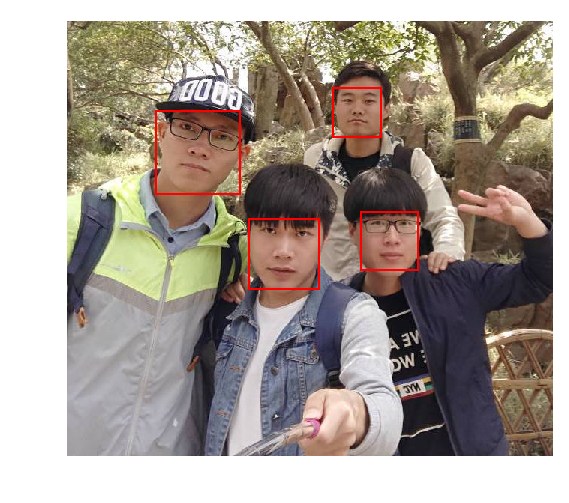

In [5]:
## 将识别的图像可视化
plt.figure()
ax = plt.subplot(111)
ax.imshow(image)
plt.axis("off")
for i, face in enumerate(dets):
    # 在图片中标注人脸，并显示
    left = face.left()
    top = face.top()
    right = face.right()
    bottom = face.bottom()
    rect = mpatches.Rectangle((left,bottom), right - left, top - bottom,
                                  fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(rect)
plt.show()

In [6]:
## 检测到人脸后，对人脸的特征点进行显示
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
image_copy = image.copy()  
for k, d in enumerate(dets):
    # 从识别的人脸d中获得人脸特征点
    detected_landmarks = predictor(image, d).parts()  
    landmarks = np.matrix([[p.x, p.y] for p in detected_landmarks]) 
    for idx, point in enumerate(landmarks):  
        pos = (point[0, 0], point[0, 1])
        # 注释点的位置
        cv2.putText(image_copy, str(idx), pos,  
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX,  
                    fontScale=0.3,  
                    color=(255, 255, 0))  

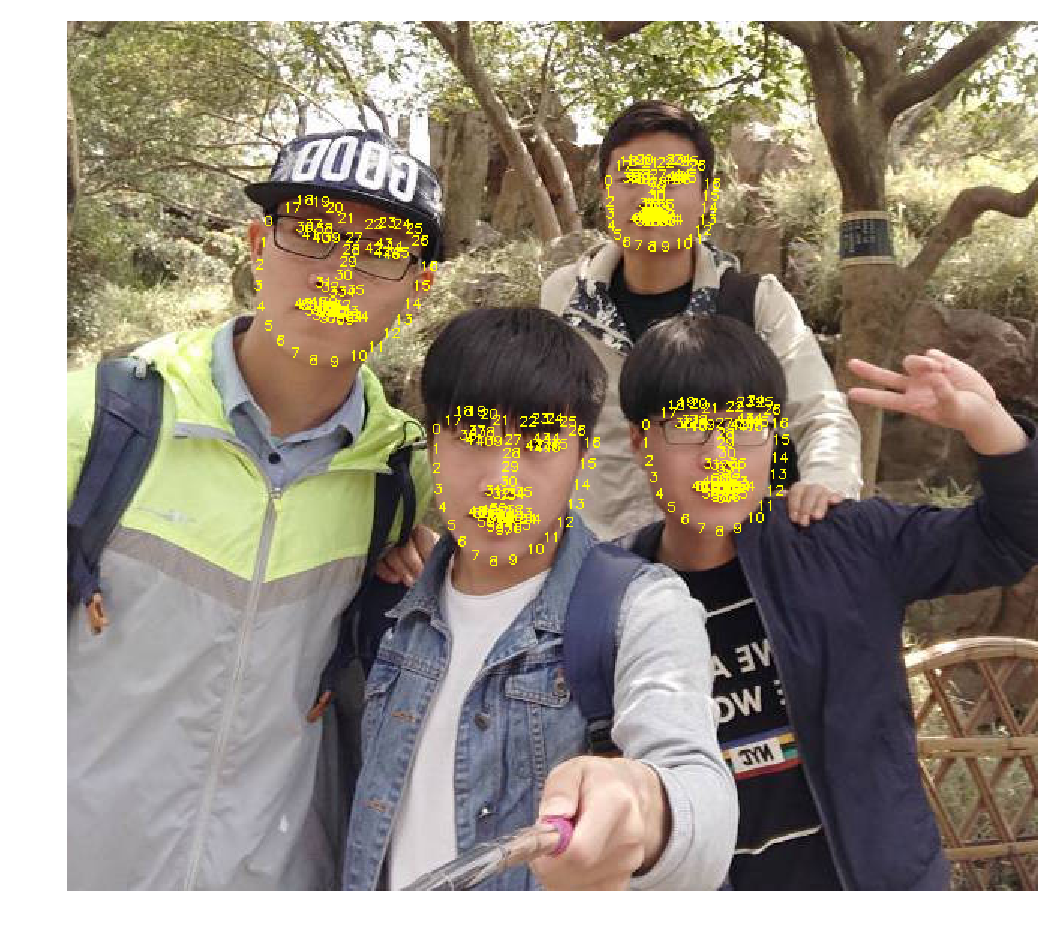

In [7]:
## 显示找到特征点后的图像
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.imshow(image_copy)
plt.axis("off")
plt.show()

#### 使用CNN方法进行人脸检测
cnn_face_detector()可以对一个图像列表进行人脸识别

upsample_num ： 为上采样次数

dets = cnn_face_detector([image list], upsample_num, batch_size = 128)


In [8]:
cnn_face_detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")
image1 = io.imread("/Users/Daitu/慕课/Python机器学习入门/data/人脸识别1.jpg")
## 第二个参数中的1表示我们应该对图像进行一次上采样。 这将使一切变得更大，并让我们能够发现更多的面孔。
cnn_dets = cnn_face_detector(image1, 1) 
print("Number of faces detected: {}".format(len(dets)))


Number of faces detected: 4


In [9]:
## [(134, 236) (232, 334)] 表示图像的[(左，上)(右，下)]
cnn_dets

mmod_rectangles[[(134, 236) (232, 334)], [(231, 360) (349, 478)], [(362, 211) (430, 279)], [(401, 367) (483, 448)]]

In [10]:
## 输出所识别的每个人脸的4个边界位置，和置信度
for i, d in enumerate(cnn_dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} ".format(
        i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom()))

Detection 0: Left: 134 Top: 236 Right: 232 Bottom: 334 
Detection 1: Left: 231 Top: 360 Right: 349 Bottom: 478 
Detection 2: Left: 362 Top: 211 Right: 430 Bottom: 279 
Detection 3: Left: 401 Top: 367 Right: 483 Bottom: 448 


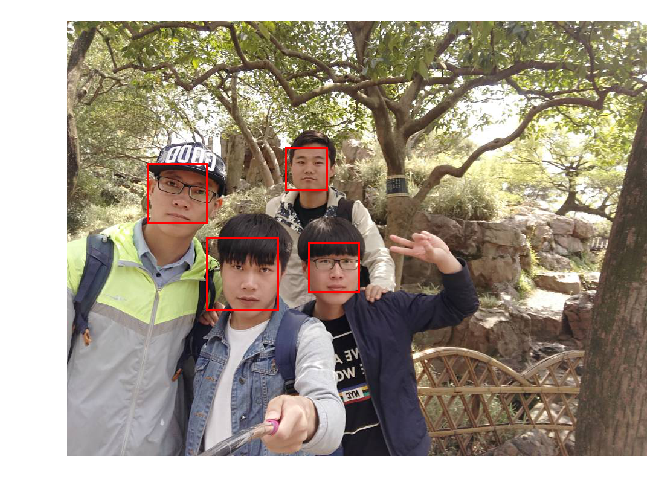

In [11]:
## 将识别的图像可视化
## 将识别的图像可视化
plt.figure()
ax = plt.subplot(111)
ax.imshow(image1)
plt.axis("off")
for i, face in enumerate(cnn_dets):
    # 在图片中标注人脸，并显示
    left = face.rect.left()
    top = face.rect.top()
    right = face.rect.right()
    bottom = face.rect.bottom()
    rect = mpatches.Rectangle((left,bottom), right - left, top - bottom,
                                  fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(rect)
plt.show()